# Cápitulo 1: Importando Dados e Primeiras Visualizações

### 1.1: Importando Dados

In [18]:
import pandas as pd

# Eliminate the warnings. 
import warnings
warnings.filterwarnings("ignore")

df_raw = pd.read_csv("npl_ffvii_raw.csv")

In [19]:
df_raw

,Unnamed: 0,Comentario
0,0,"8FrancisWoodlyJul 3, 2024Overall I really like..."
1,1,"10KingkennnJul 2, 2024This is masterpiece. It ..."
2,2,"9VoltroJul 2, 2024[SPOILER ALERT: This review ..."
3,3,"1Anna1981Jul 1, 2024I just did not like it. I ..."
4,4,"10danizavarceJun 30, 2024It's perfect. The sou..."
...,...,...
17922,17922,"9Pizza-ShipMar 1, 2024[SPOILER ALERT: This rev..."
17923,17923,"10srosebraceMar 1, 2024{review in proggress)\n..."
17924,17924,"10diegovskMar 1, 2024""Amazing game, delivered ..."
17925,17925,"10SnitterMar 1, 2024Quality sequel. Much bette..."


### 1.2: Tipos de Dados

In [20]:
df_raw.dtypes

Unnamed: 0     int64
Comentario    object
dtype: object

# Cápitulo 2: Processamento de Dados

In [21]:
df_clean = df_raw.copy()

# Remover duplicatas mantendo apenas uma ocorrência
df_clean = df_raw.drop_duplicates(subset='Comentario')

# Mostrar DataFrame sem duplicatas
print("DataFrame sem duplicatas:")
df_clean

DataFrame sem duplicatas:


,Unnamed: 0,Comentario
0,0,"8FrancisWoodlyJul 3, 2024Overall I really like..."
1,1,"10KingkennnJul 2, 2024This is masterpiece. It ..."
2,2,"9VoltroJul 2, 2024[SPOILER ALERT: This review ..."
3,3,"1Anna1981Jul 1, 2024I just did not like it. I ..."
4,4,"10danizavarceJun 30, 2024It's perfect. The sou..."
...,...,...
17922,17922,"9Pizza-ShipMar 1, 2024[SPOILER ALERT: This rev..."
17923,17923,"10srosebraceMar 1, 2024{review in proggress)\n..."
17924,17924,"10diegovskMar 1, 2024""Amazing game, delivered ..."
17925,17925,"10SnitterMar 1, 2024Quality sequel. Much bette..."


### 2.1: Limpar Comentários

In [22]:
import re

# Função para limpar o comentário
def limpar_comentario(comentario):
    # Extrai o nome do usuário corretamente, excluindo meses
    nome_usuario_match = re.match(r'^\d*(\D+)', comentario)
    nome_usuario = nome_usuario_match.group(1).strip() if nome_usuario_match else ''

    # Remove os meses do nome do usuário
    nome_usuario = re.split(r'(Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)', nome_usuario)[0].strip()

    # Extrai a data corretamente
    data_match = re.search(r'(Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec) \d{1,2}, \d{4}', comentario)
    data = data_match.group(0) if data_match else 'Jan 1, 1900'  # Valor padrão caso a data não seja encontrada

    # Converte a data para datetime
    data_datetime = pd.to_datetime(data)

    # Extrai o comentário limpo
    comentario_limpo = re.sub(r'^\d*\D+\w+ \d{1,2}, \d{4}', '', comentario).strip()

    # Remove 'Read More' se existir
    comentario_limpo = comentario_limpo.replace('Read More', '')

    # Remove espaços extras no início e no fim do comentário
    comentario_limpo = comentario_limpo.strip()

    return nome_usuario, data_datetime, comentario_limpo

In [23]:
# Aplica a função ao DataFrame
df_clean[['Nome', 'Data', 'Comentario']] = df_clean['Comentario'].apply(lambda x: pd.Series(limpar_comentario(x)))
df_clean['Comentario_Limpo'] = df_clean['Comentario']
df_clean

,Unnamed: 0,Comentario,Nome,Data,Comentario_Limpo
0,0,Overall I really liked FF7 Rebirth BUT there w...,FrancisWoodly,2024-07-03,Overall I really liked FF7 Rebirth BUT there w...
1,1,This is masterpiece. It has to win GOTY 2024!!...,Kingkennn,2024-07-02,This is masterpiece. It has to win GOTY 2024!!...
2,2,[SPOILER ALERT: This review contains spoilers.],Voltro,2024-07-02,[SPOILER ALERT: This review contains spoilers.]
3,3,I just did not like it. I am a fan of the orig...,Anna,2024-07-01,I just did not like it. I am a fan of the orig...
4,4,"It's perfect. The soundtrack, the story, the c...",danizavarce,2024-06-30,"It's perfect. The soundtrack, the story, the c..."
...,...,...,...,...,...
17922,17922,[SPOILER ALERT: This review contains spoilers.],Pizza-Ship,2024-03-01,[SPOILER ALERT: This review contains spoilers.]
17923,17923,{review in proggress)\nas of right now FFVIIR ...,srosebrace,2024-03-01,{review in proggress)\nas of right now FFVIIR ...
17924,17924,"""Amazing game, delivered everything I was hopi...",diegovsk,2024-03-01,"""Amazing game, delivered everything I was hopi..."
17925,17925,Quality sequel. Much better than Remake with i...,Snitter,2024-03-01,Quality sequel. Much better than Remake with i...


### 2.2: Traduzir Comentários

In [24]:
from googletrans import Translator
from langdetect import detect

# Instantiate translator
translator = Translator()

# List to store original and translated comments
translated_comments = []

# Function to detect language and translate to English
def traduzir_para_ingles(comentario, index):
    try:
        if detect(comentario) != 'en':
            translated_text = translator.translate(comentario, src=detect(comentario), dest='en').text
            translated_comments.append({'Index': index, 'Original': comentario, 'Translated': translated_text})
            return translated_text
        return comentario
    except:
        return comentario

In [25]:
# Apply the translation function to the 'Comentário' column safely using .loc
df_clean.loc[:, 'Comentario_Limpo'] = df_clean.apply(lambda row: traduzir_para_ingles(row['Comentario_Limpo'], row.name), axis=1)

# Create a DataFrame with the original and translated comments
df_translated = pd.DataFrame(translated_comments)

df_translated.head(10)

,Index,Original,Translated
0,23,濃密な85時間を過ごしました、ものすごい物量にただ圧倒されるばかりでした。\nティファ推しは...,"I spent a dense 85 hours, just overwhelmed the..."
1,47,"un juego epico , no es un remake simplemente, ...","An epic game is not a remake simply, it is a n..."
2,50,Apesar do game alterar a história com a implem...,Although the game changes the story with the i...
3,59,Maravilhoso... eu joguei o do PS1 e adorei... ...,WONDERFUL ... I played PS1 and I loved it ... ...
4,74,"Una maravilla indescriptible, llena de sorpres...","An indescribable wonder, full of surprises and..."
5,78,"Le meilleur jeu PlayStation 5 tout simplement,...","The best PlayStation 5 game quite simply, an e..."
6,84,Final Fantasy 7 Rebirth signe le nouvel âge d’...,Final Fantasy 7 Rebirth signs the new golden a...
7,87,A frase que define esse jogo para mim é: o mel...,The phrase that defines this game for me is: t...
8,102,vraiment passer un bon moment graphiquement le...,Really have a good time graphically the dynami...
9,113,Final Fantasy VII Rebirth es un tributo amoros...,Final Fantasy VII Rebirth is a love tribute an...


### 2.3: Tratamentos Finais

In [26]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
from autocorrect import Speller

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
spell = Speller(lang='en')

# Define text preprocessing function
def preprocess_and_correct_text(text):
    # Remove pontuação e números
    text = re.sub(r'[\d{}]+'.format(re.escape(string.punctuation)), '', text)
    # Tokenização
    words = word_tokenize(text)
    # Remover stop words, lematizar e corrigir ortografia
    processed_words = [spell(lemmatizer.lemmatize(word.lower())) for word in words if word.lower() not in stop_words]
    # Juntar as palavras em uma string única e normalizar espaços em branco
    cleaned_text = ' '.join(processed_words).strip()
    return cleaned_text

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [27]:
df_clean['Comentario_Limpo'] = df_clean['Comentario_Limpo'].apply(preprocess_and_correct_text)
df_clean

,Unnamed: 0,Comentario,Nome,Data,Comentario_Limpo
0,0,Overall I really liked FF7 Rebirth BUT there w...,FrancisWoodly,2024-07-03,overall really liked ff rebirth thing really d...
1,1,This is masterpiece. It has to win GOTY 2024!!...,Kingkennn,2024-07-02,masterpiece win got assure ff rebirth best rpg...
2,2,[SPOILER ALERT: This review contains spoilers.],Voltro,2024-07-02,spoiler alert review contains spoiler
3,3,I just did not like it. I am a fan of the orig...,Anna,2024-07-01,like fan original thought remake alright rebir...
4,4,"It's perfect. The soundtrack, the story, the c...",danizavarce,2024-06-30,perfect soundtrack story character gameplay re...
...,...,...,...,...,...
17922,17922,[SPOILER ALERT: This review contains spoilers.],Pizza-Ship,2024-03-01,spoiler alert review contains spoiler
17923,17923,{review in proggress)\nas of right now FFVIIR ...,srosebrace,2024-03-01,review progress right ffviir love letter origi...
17924,17924,"""Amazing game, delivered everything I was hopi...",diegovsk,2024-03-01,amazing game delivered everything hoping beaut...
17925,17925,Quality sequel. Much better than Remake with i...,Snitter,2024-03-01,quality sequel much better remake improved gra...


# Cápitulo 3: Análise de Sentimentos

### 3.1: Vader

In [28]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment_vader(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'positivo'
    elif score['compound'] <= -0.05:
        return 'negativo'
    else:
        return 'neutro'

In [29]:
# Aplicar a função à coluna 'Comentário' e armazenar o resultado em uma nova coluna 'Sentimento'
df_clean['Sentimento'] = df_clean['Comentario_Limpo'].apply(analyze_sentiment_vader)

### 3.2: Análise de Resultados

In [30]:
# Filtrar linhas onde 'Sentimento' é 'positivo'
comentarios_positivos = df_clean[df_clean['Sentimento'] == 'positivo']

comentarios_positivos.head(10)

,Unnamed: 0,Comentario,Nome,Data,Comentario_Limpo,Sentimento
0,0,Overall I really liked FF7 Rebirth BUT there w...,FrancisWoodly,2024-07-03,overall really liked ff rebirth thing really d...,positivo
1,1,This is masterpiece. It has to win GOTY 2024!!...,Kingkennn,2024-07-02,masterpiece win got assure ff rebirth best rpg...,positivo
2,2,[SPOILER ALERT: This review contains spoilers.],Voltro,2024-07-02,spoiler alert review contains spoiler,positivo
3,3,I just did not like it. I am a fan of the orig...,Anna,2024-07-01,like fan original thought remake alright rebir...,positivo
4,4,"It's perfect. The soundtrack, the story, the c...",danizavarce,2024-06-30,perfect soundtrack story character gameplay re...,positivo
5,5,Magnificent Masterpiece. FFVII Rebirth is GOTY...,kuraudoxs,2024-06-29,magnificent masterpiece vii rebirth got went e...,positivo
6,6,It’s greatest of games which I played.\n You ...,bolion,2024-06-28,’ greatest game played adventure friend vast m...,positivo
7,7,Best FF game I've played for a very long time....,sjneo,2024-06-28,best ff game ive played long time finished gam...,positivo
9,9,A downgrade comparated to the original PS1 gam...,Licez,2024-06-26,downgraded compared original p game time littl...,positivo
10,10,Loved every moment playing it (maybe a part fr...,Myronjfs,2024-06-25,loved every moment playing maybe part brief ca...,positivo


In [31]:
# Filtrar linhas onde 'Sentimento' é 'negativo'
comentarios_negativos = df_clean[df_clean['Sentimento'] == 'negativo']

comentarios_negativos.head(10)

,Unnamed: 0,Comentario,Nome,Data,Comentario_Limpo,Sentimento
8,8,Overrated. This is the only word that come to ...,lukerom,2024-06-26,operated word come mind im watching please tal...,negativo
26,26,The story and combat mechanics are great but t...,dioholydiver,2024-06-18,story combat mechanic great minigames boring o...,negativo
28,28,Having the time of my life with this game rn. ...,Mightystar,2024-06-17,time life game rn everything high quality cuts...,negativo
46,46,"Very immersive and memorable experience, it su...",stevenwang,2024-06-07,immersive memorable experience surpasses fire ...,negativo
87,87,A frase que define esse jogo para mim é: o mel...,wnedgar,2024-05-24,phrase defines game best game ever recommend a...,negativo
99,99,Squeezing a PS1 game into three remakes was a ...,JonayAD,2024-05-22,squeezing p game three remake huge mistake lot...,negativo
127,127,An absolutely ugly mess. Take your money and t...,Witem_,2024-05-19,absolutely ugly mess take money throw window l...,negativo
131,131,This game deserves 9/10 for me. It’s very stra...,Keenking,2024-05-18,game deserves ’ strange negative review added ...,negativo
135,135,Why so many mini games? Why didn't they use th...,VicSakai,2024-05-18,many mini game didnt use effort making mini ga...,negativo
146,146,Rebirth and Stellar Blade is once again under ...,Gwyndolin,2024-05-14,rebirth stellar blade attack troll spamming ze...,negativo


In [32]:
# Filtrar linhas onde 'Sentimento' é 'neutro'
comentarios_neutros = df_clean[df_clean['Sentimento'] == 'neutro']

comentarios_neutros.head(10)

,Unnamed: 0,Comentario,Nome,Data,Comentario_Limpo,Sentimento
39,39,10/10 story. But side content got overwhelming...,Chrisiscool,2024-06-10,story side content got overwhelming especially...,neutro
45,45,Garbage gameplay mindless nothing special its ...,RedReaper,2024-06-07,garbage gameplay mindless nothing special bori...,neutro
47,47,"un juego epico , no es un remake simplemente, ...",bob-shiver,2024-06-06,epic game remake simply new game following sto...,neutro
68,68,So many fake people on this site\n\nAnyone who...,,2024-03-03,many fake people site anyone give rebirth even...,neutro
70,70,A game like never before.\n\nHonestly this gam...,Courtsyking,2024-05-28,game like never honestly game changed rpg genre,neutro
90,90,It was 9 points before Stellarblade I think ei...,Giho,2024-05-23,point stellarblade think eight point appropria...,neutro
96,96,10/10 game. It was perfect the whole way **** ...,Lunarangelcm,2024-05-22,game perfect whole way going sad wait followup...,neutro
107,107,"Despite 30 years of expectations, Rebirth some...",,2024-05-20,despite year expectation rebirth somehow manag...,neutro
136,136,Incredible game. Still thinking of the ending ...,_ls,2024-05-18,incredible game still thinking ending even fin...,neutro
318,318,︎\n︎︎\n︎︎\n︎︎\n︎︎\n︎︎\n︎︎\n︎︎\n︎︎\n︎︎\n︎︎\n︎︎\...,Yoyotbjr,2024-05-15,︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎ ︎︎...,neutro


# Cápitulo 4: Análise Visual

### 4.1: Distribuição de Sentimentos

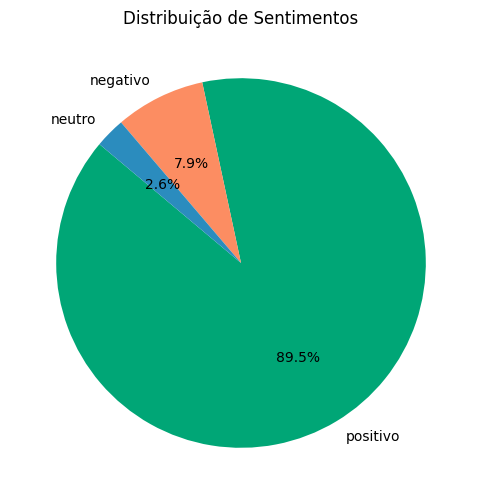

In [33]:
import matplotlib.pyplot as plt

# Conta a quantidade de cada valor na coluna 'Sentimento'
contagem_sentimentos = df_clean['Sentimento'].value_counts()

# Prepara os dados para o gráfico de pizza
labels = contagem_sentimentos.index
sizes = contagem_sentimentos.values

# Cores correspondentes aos sentimentos
cores = {
    'positivo': '#00a676',  # Verde mais escuro
    'neutro': '#2b8cbe',    # Azul mais escuro
    'negativo': '#fc8d62'   # Vermelho mais escuro
}

# Cria o gráfico de pizza
plt.figure(figsize=(8, 6))  # Tamanho da figura (opcional)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=[cores[label] for label in labels])

# Adiciona título
plt.title('Distribuição de Sentimentos')

# Mostra o gráfico
plt.show()

### 4.2: Análise Temporal de Comentários

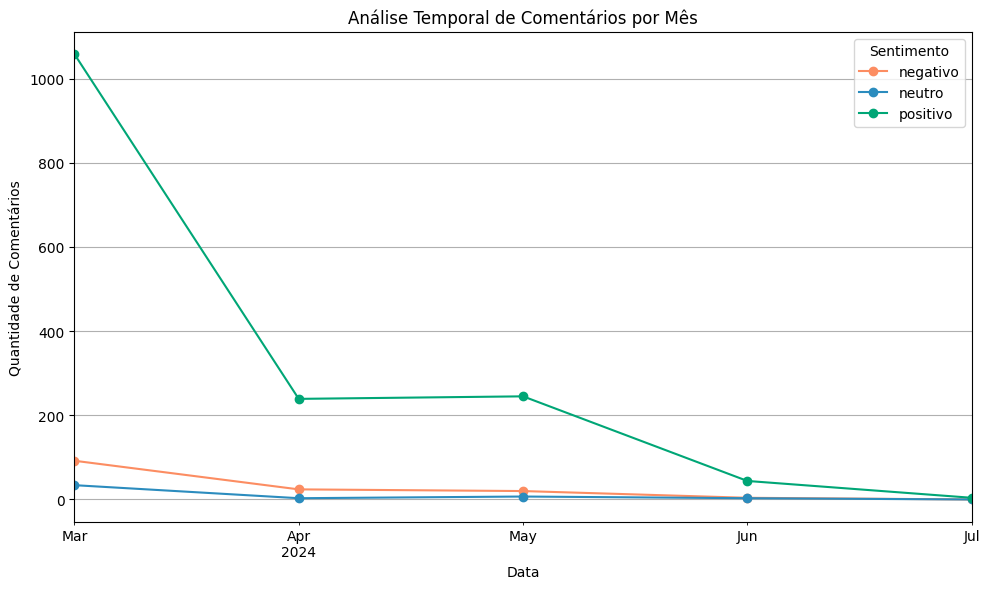

In [37]:
# Agrupar por mês e sentimento
comentarios_por_mes = df_clean.groupby([pd.Grouper(key='Data', freq='M'), 'Sentimento']).size().unstack(fill_value=0)

# Plotar o gráfico de linha com cores personalizadas
ax = comentarios_por_mes.plot(kind='line', marker='o', linestyle='-', figsize=(10, 6), color=[cores.get(x, '#333333') for x in comentarios_por_mes.columns])
plt.xlabel('Data')
plt.ylabel('Quantidade de Comentários')
plt.title('Análise Temporal de Comentários por Mês')
plt.legend(title='Sentimento')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

In [35]:
# df_clean.to_csv("npl_ffvii_clean.csv")